In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML

In [3]:
df = pd.read_csv('results.csv')

df.head()

,Dataset,Algorithm,Time(s),Solution Quality,Full Tour,RelError
0,Atlanta,BF,200.0,3363473.77,Yes,0.00%
1,Atlanta,BF,200.0,3353388.44,Yes,0.00%
2,Atlanta,BF,200.0,3353388.44,Yes,0.00%
3,Atlanta,BF,200.0,3353388.44,Yes,0.00%
4,Atlanta,BF,200.0,3353388.44,Yes,0.00%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dataset           471 non-null    object 
 1   Algorithm         471 non-null    object 
 2   Time(s)           471 non-null    float64
 3   Solution Quality  471 non-null    float64
 4   Full Tour         471 non-null    object 
 5   RelError          471 non-null    object 
dtypes: float64(2), object(4)
memory usage: 22.2+ KB


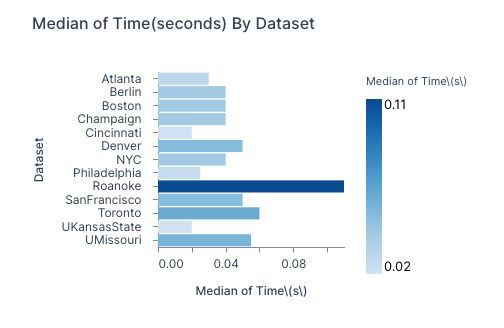

In [ ]:
Image('plots/mediam-time.png')

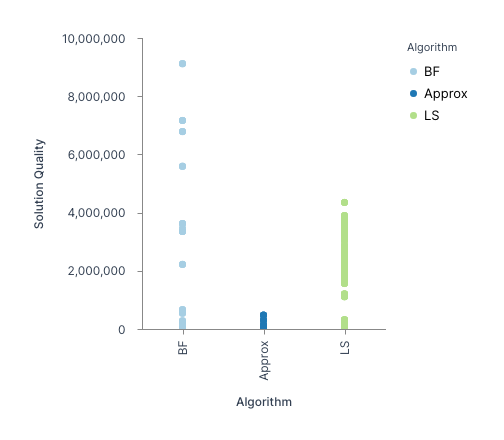

In [7]:
Image('plots/quality.png')

## description of each of algorithms 

1. Brute Force 
2. Approximate with MST
3. Local Search with Simulated Annealing

### 1. Brute Force 

The Brute Force algorithm calculate the all permutations of the cities and return the optimal tour and its cost. Time complexity: O(n!)


### 2. Approximate with MST


The Approximate with MST algorithm is a 2-approximation algorithm.
It constructs a Minimun Spanning Tree(MST) and make depth-first search.
Time complexity: O(n^2 logn)
Algorithm: 
1. compute distrance matrix
2. construct MST with Kruskal's algorithm
3. List visited  cities in preorder walk of the MST and add 1 at the end.


https://www.geeksforgeeks.org/approximate-solution-for-travelling-salesman-problem-using-mst/

### 3. Local search with simulated annealing

Simulated Annealing is a local search algorithm and can achieve near-optimal results.
Algorithm:
1. init with a random travel, temperature, and cooling rate.
2. while temperature is higher than limit:
	swap two cities and generate a travel, calculate cost
	accept new state
	update the local optimal travel
	decrease temperature with cooling rate

3. return the local optimum





## Performance Comparison Table


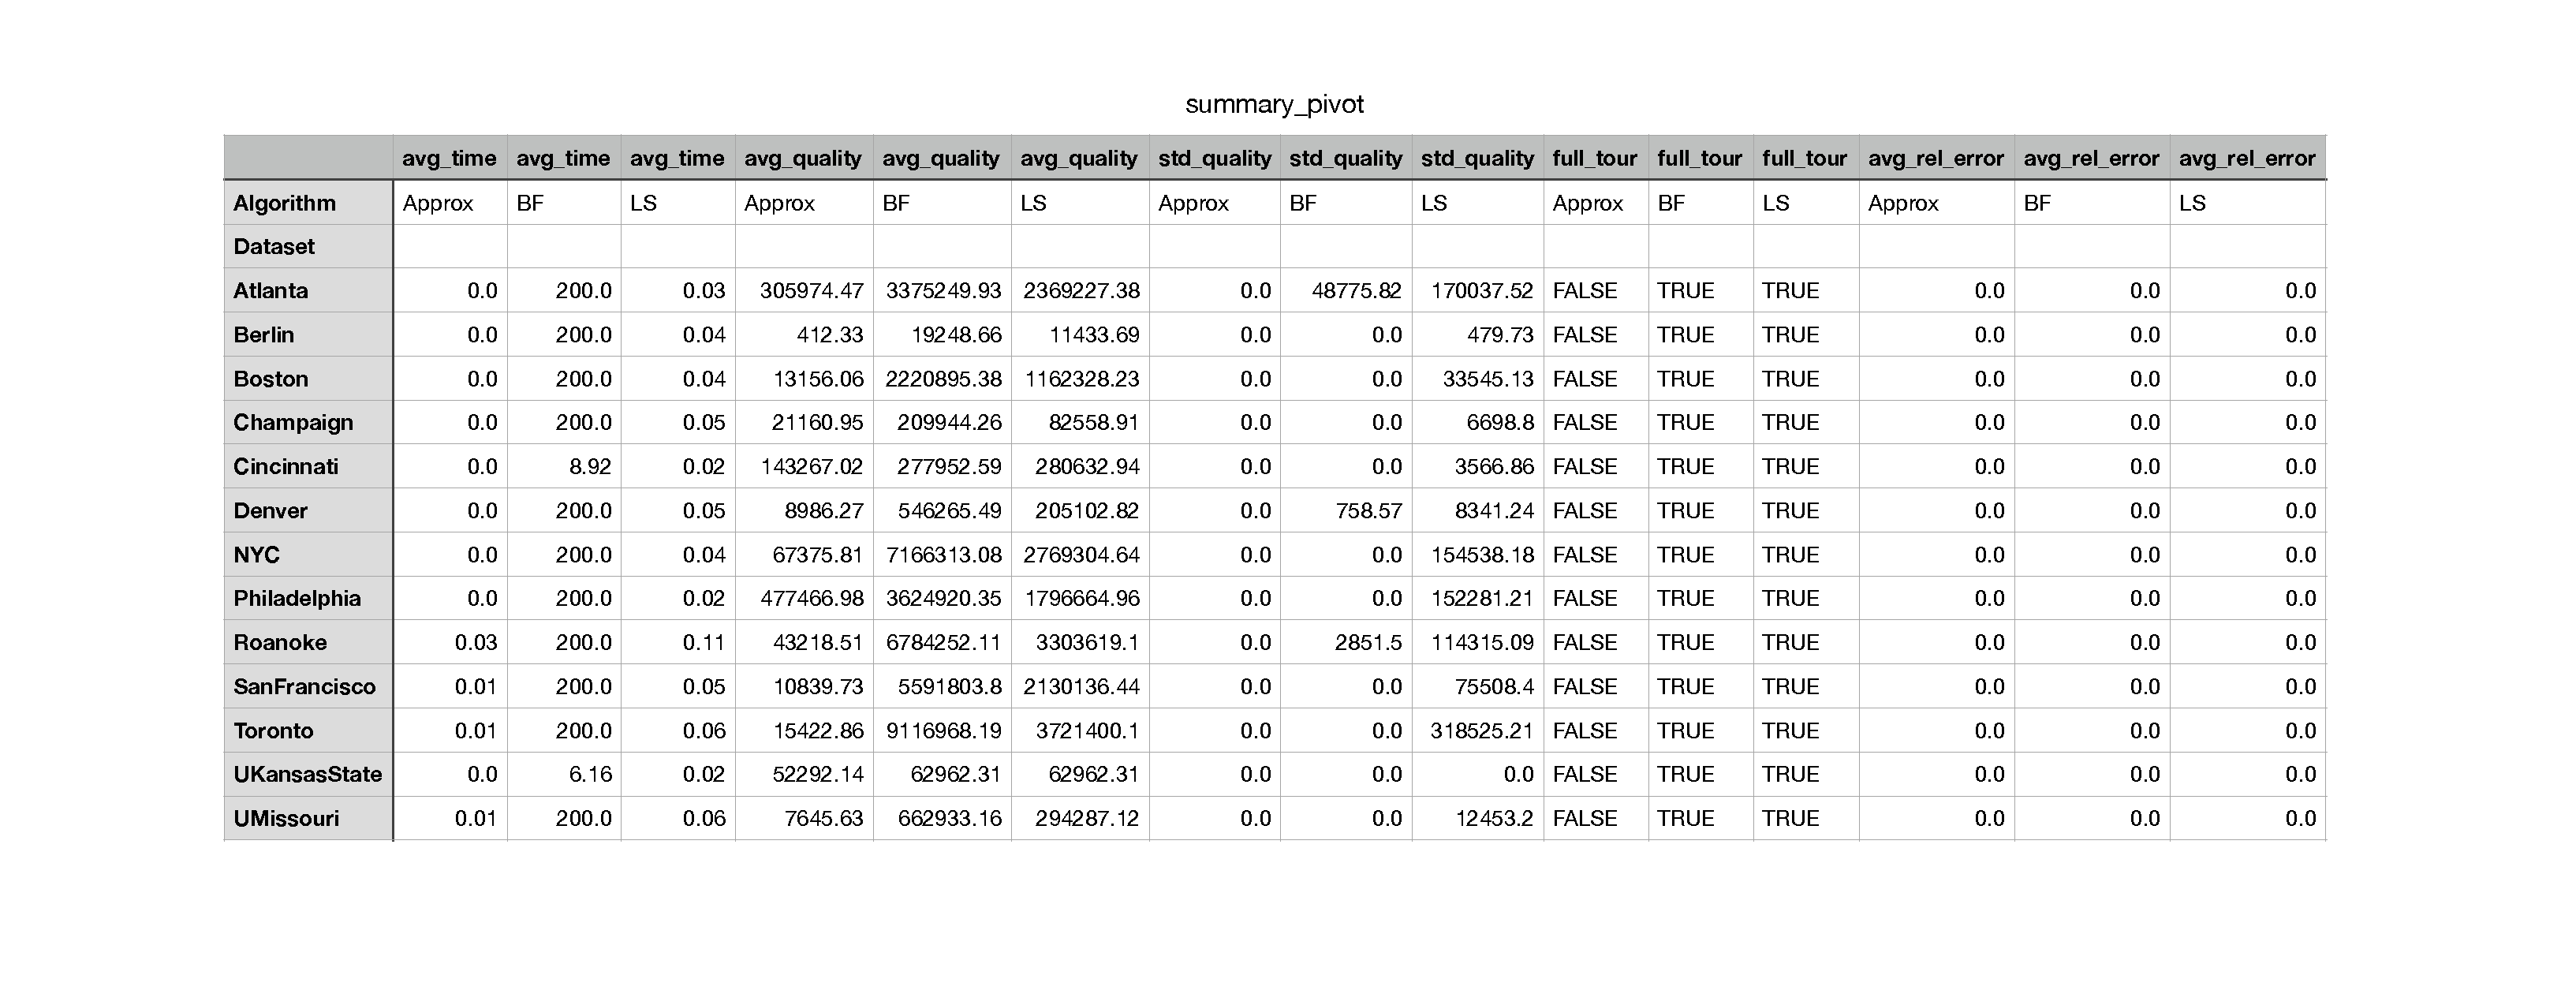

In [18]:
Image('plots/summary_pivot.png')




## Cut off time affection solution quality

In [8]:
# Preview the dataset
print("Dataset Overview:")
print(df.head())

# summary statistics
print("\nDataset Summary:")
print(df.describe())



Dataset Overview:
   Dataset Algorithm  Time(s)  Solution Quality Full Tour RelError
0  Atlanta        BF    200.0        3363473.77       Yes    0.00%
1  Atlanta        BF    200.0        3353388.44       Yes    0.00%
2  Atlanta        BF    200.0        3353388.44       Yes    0.00%
3  Atlanta        BF    200.0        3353388.44       Yes    0.00%
4  Atlanta        BF    200.0        3353388.44       Yes    0.00%

Dataset Summary:
          Time(s)  Solution Quality
count  471.000000      4.710000e+02
mean    15.421104      1.440120e+06
std     53.162693      1.605733e+06
min      0.000000      4.123300e+02
25%      0.030000      8.756705e+04
50%      0.040000      6.629332e+05
75%      0.060000      2.457017e+06
max    200.000000      9.116968e+06


In [10]:
# Group by dataset and algorithm
summary = df.groupby(["Dataset", "Algorithm"]).agg(
    avg_time=("Time(s)", "mean"),
    avg_quality=("Solution Quality", "mean"),
    std_quality=("Solution Quality", "std"),
    full_tour=("Full Tour", lambda x: x.eq("Yes").mean()),  # Percentage of full tours
    avg_rel_error=("RelError", lambda x: x.str.rstrip('%').astype(float).mean())
).reset_index()

# Print summary
print("\nSummary Statistics:")
print(summary)



Summary Statistics:
         Dataset Algorithm    avg_time   avg_quality    std_quality  \
0        Atlanta    Approx    0.003333  3.059745e+05       0.000000   
1        Atlanta        BF  200.000000  3.375250e+06   48775.817887   
2        Atlanta        LS    0.029000  2.369227e+06  170037.524826   
3         Berlin    Approx    0.000000  4.123300e+02       0.000000   
4         Berlin        BF  200.000000  1.924866e+04       0.000000   
5         Berlin        LS    0.042667  1.143369e+04     479.726851   
6         Boston    Approx    0.000000  1.315606e+04       0.000000   
7         Boston        BF  200.000000  2.220895e+06       0.000000   
8         Boston        LS    0.039667  1.162328e+06   33545.126421   
9      Champaign    Approx    0.000000  2.116095e+04       0.000000   
10     Champaign        BF  200.000000  2.099443e+05       0.000000   
11     Champaign        LS    0.045667  8.255891e+04    6698.795526   
12    Cincinnati    Approx    0.000000  1.432670e+05    

In [13]:

summary_pivot = summary.pivot(index="Dataset", columns="Algorithm")

print("\nSummary Pivot:")
print(summary_pivot)

# save to csv
summary_pivot.to_csv('summary.csv')




Summary Pivot:
              avg_time                       avg_quality                \
Algorithm       Approx          BF        LS      Approx            BF   
Dataset                                                                  
Atlanta       0.003333  200.000000  0.029000   305974.47  3.375250e+06   
Berlin        0.000000  200.000000  0.042667      412.33  1.924866e+04   
Boston        0.000000  200.000000  0.039667    13156.06  2.220895e+06   
Champaign     0.000000  200.000000  0.045667    21160.95  2.099443e+05   
Cincinnati    0.000000    8.923333  0.019667   143267.02  2.779526e+05   
Denver        0.003333  200.000000  0.049000     8986.27  5.462655e+05   
NYC           0.000000  200.000000  0.041333    67375.81  7.166313e+06   
Philadelphia  0.000000  200.000000  0.025000   477466.98  3.624920e+06   
Roanoke       0.030000  200.000000  0.114667    43218.51  6.784252e+06   
SanFrancisco  0.010000  200.000000  0.051333    10839.73  5.591804e+06   
Toronto       0.010000

In [17]:
# round to 2 decimal places
summary_pivot = summary_pivot.round(2)

# change full_tour to true/false
summary_pivot["full_tour"] = summary_pivot["full_tour"].apply(lambda x: x > 0.5)

summary_pivot.to_csv('summary_pivot.csv')

## Reference

  
[1]GeeksforGeeks, “Approximate solution for Travelling Salesman Problem using MST,” GeeksforGeeks, Nov. 04, 2013. Accessed: Dec. 02, 2024. [Online]. Available: https://www.geeksforgeeks.org/approximate-solution-for-travelling-salesman-problem-using-mst/

  
[1]“minimum_spanning_tree — SciPy v1.14.1 Manual.” Accessed: Dec. 02, 2024. [Online]. Available: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.minimum_spanning_tree.html
  



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5f1724a1-6e65-4e53-b284-f7ca2da061f3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>